In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Reading datasets
And a first look at the data

In [2]:
calendar_data = pd.read_csv('calendar.csv')
listings_data = pd.read_csv('listings.csv')

In [3]:
calendar_data.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
listings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [29]:
# removing not numeric features
cols = [col for col in listings_data if 'id' not in col]

listings_data[cols].describe()

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [30]:
listings_data['price'].describe()

count        3818
unique        273
top       $150.00
freq          162
Name: price, dtype: object

In [6]:
# Making a copy to keep the original dataset
listings = listings_data.copy()

In [7]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [8]:
calendar = calendar_data.copy()

calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


### Formulating questions

After checking the data available in the datasets, the following questions could be formulated:

1 - Are there any seasonality regarding to the booking prices?

2 - A good response rate from hosts leads to their place have a higher booking frequency?

3 - Do the positive reviews leads to higher prices and booking frequency?

### Data Wrangling

Preparing some of the features in the dataset to be available to the data analysis

In [9]:
listings[['review_scores_rating']].sample(5)

,review_scores_rating
2435,96.0
3210,100.0
1118,88.0
3307,NaN
772,97.0


In [10]:
# dividing 'review_scores_rating' by 100 to be a percentage description
listings['review_scores_rating'] = listings.review_scores_rating / 100

In [11]:
# Casting 'available' to bool type
calendar['available'] = calendar.available == 't'

# Casting 'host_is_superhost' to bool type
listings['host_is_superhost'] = listings.host_is_superhost == 't'

In [12]:
# Casting 'date' from string to a proper date type
calendar['date'] = calendar.date.astype('datetime64[ns]')

In [13]:
# Fixing price from string to the proper float type
def price_to_float(price):
    price_is_null = price != price
    
    if price_is_null:
        return np.nan
    
    price = price.replace('$', '')
    price = price.replace(',', '')
    
    return float(price)

calendar['price'] = calendar.price.map(price_to_float)

In [14]:
# Checking dataset after wrangling
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
2,241032,2016-01-06,False,NaN
3,241032,2016-01-07,False,NaN
4,241032,2016-01-08,False,NaN


In [15]:
# Creating some new variables to data visualization
calendar['day'] = calendar.date.dt.day
calendar['week'] = calendar.date.dt.week

calendar['day_of_week'] = pd.Categorical(
    calendar.date.dt.day_name(), 
    ordered=True,
    categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
)

C:\Users\TIAGO~1.WUT\AppData\Local\Temp/ipykernel_4304/702612508.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  calendar['week'] = calendar.date.dt.week


In [16]:
# Fixing percentage from string to float type
def percentage_to_float(percentage):
    percentage_is_null = percentage != percentage
    
    if percentage_is_null:
        return np.nan
    
    percentage = percentage.replace('%', '')
    
    return float(percentage) / 100

listings['host_response_rate'] = listings.host_response_rate.map(percentage_to_float)

### Data Exploration

In [17]:
# Default white background to the plots
sns.set(rc={'figure.figsize':(20, 8)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

##### 1 - Are there any seasonality regarding to the booking prices?


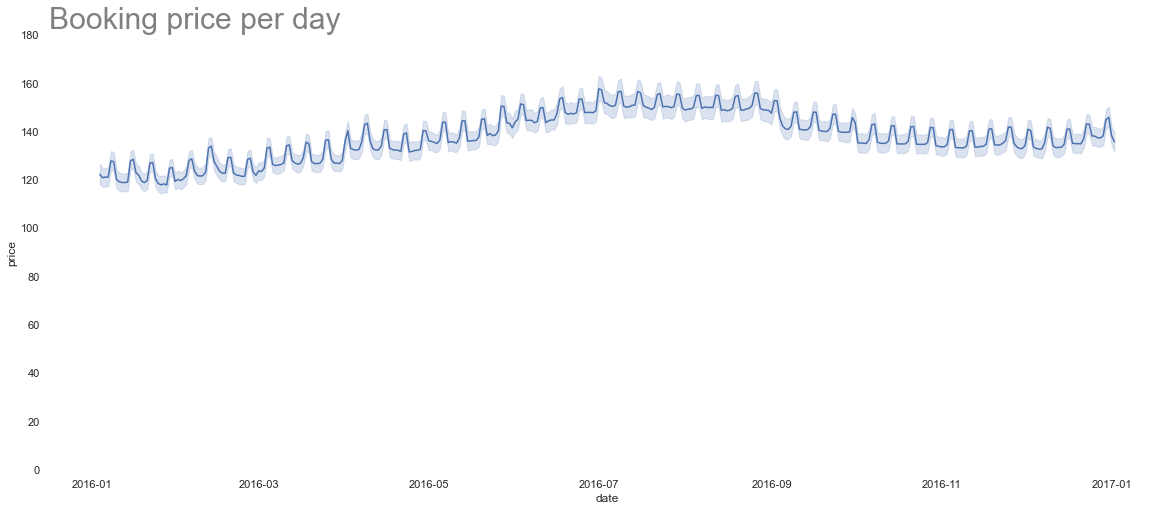

In [18]:
plt.ylim(0, 180)

sns.lineplot(
    x='date',
    y='price',
    data=calendar.loc[calendar.available]
);

plt.title("Booking price per day", fontsize=30, fontweight=0, color='gray', loc='left');

It seems to exist a seasonality only in a week basis. In a whole year the time series shows no evidence of a month seasonality.

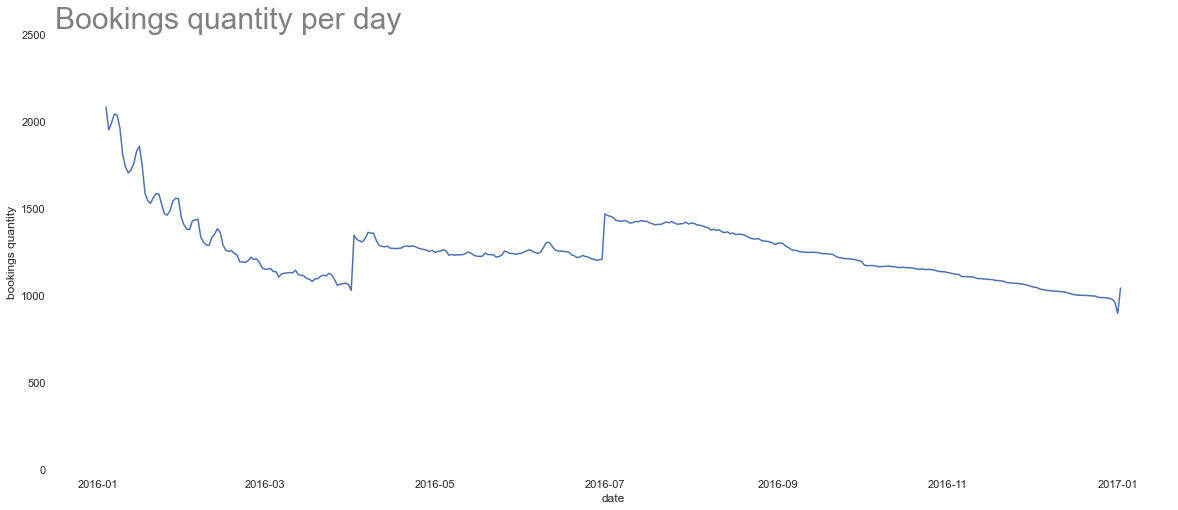

In [22]:
sns.set(rc={'figure.figsize':(20, 8)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

bookings = calendar.loc[~calendar.available].groupby(['date']).listing_id.count().reset_index()

plt.ylim(0, 2500)

sns.lineplot(
    x='date',
    y='listing_id',
    data=bookings
).set_ylabel('bookings quantity');

plt.title("Bookings quantity per day", fontsize=30, fontweight=0, color='gray', loc='left');

Checking the bookings quantity we can see three peaks:

1 - In early 2016 followed by a declination trend
- Likely due the new year's eve and vacation period

2 - Early April followed by a flat trend
- The Spring season motivates people to visit Seattle

3 - Early July followed by a declination trend
- 4th July holiday motivates people to see the fireworks in Seattle - Fireworks in space needle is pretty famous.

Let's check the price median for these three specific periods to assess if there's some difference regarding the whole year median.

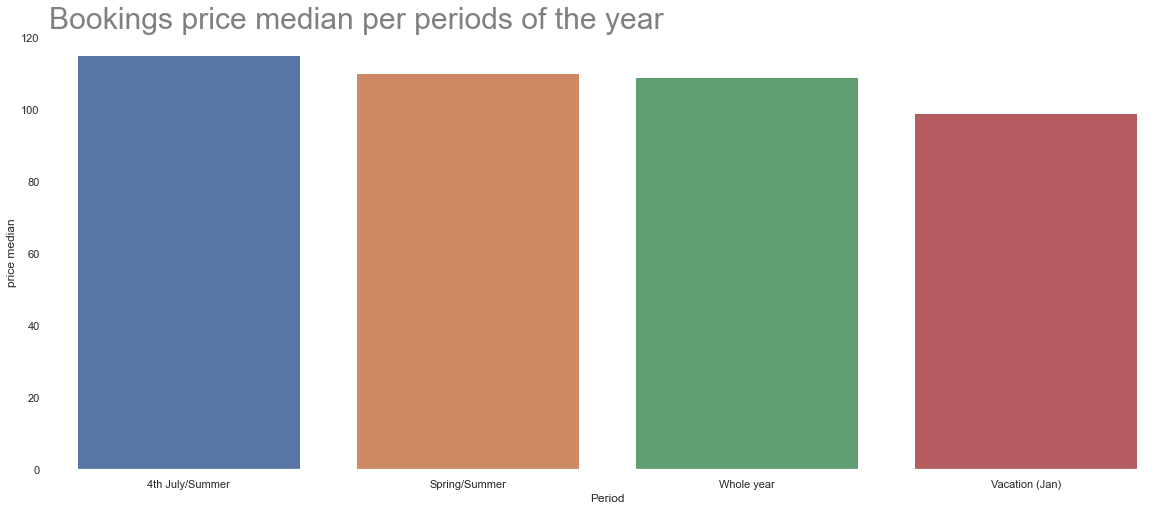

In [24]:
plot_price_medians = calendar.copy()
plot_price_medians['Period'] = 'Whole year'

new_year = plot_price_medians.query('date >= "2016-01-01" & date <= "2016-01-31"').copy()
new_year['Period'] = 'Vacation (Jan)'

spring = plot_price_medians.query('date >= "2016-04-01" & date <= "2016-06-30"').copy()
spring['Period'] = 'Spring/Summer'

fourth_july = plot_price_medians.query('date >= "2016-07-01" & date <= "2016-08-30"').copy()
fourth_july['Period'] = '4th July/Summer'

plot_median_prices_by_periods = (
    plot_price_medians
        .append(new_year)
        .append(spring)
        .append(fourth_july)
)

plot_median_prices_by_periods = (
    plot_median_prices_by_periods
        .loc[plot_median_prices_by_periods.available]
        .groupby(['Period'])
        .price.median()
        .reset_index()
        .sort_values('price', ascending=False)
)
    
sns.barplot( 
    x='Period',
    y='price',
    data=plot_median_prices_by_periods,
#     color='lightblue'
).set_ylabel('price median');

plt.title("Bookings price median per periods of the year", fontsize=30, fontweight=0, color='gray', loc='left');

This seems awkward. Vacation period has the most booking in the whole year, but has the lowest price median among the analyzed periods.

Well, since we are checking only the prices in place which are available we can get some sort of bias here. We need the prices of the booked place in order to have a complete vision of the real prices of the periods.

In [37]:
# checking unique price value in the first id of listing_data dataframe
calendar.loc[calendar['listing_id'] == 241032].price.unique()

array([85., nan])

For the listing id `241032` the price doesn't change througout the year.

Let's check the rest of the listings.

In [45]:
listing_ids = np.array(listings_data.id)

total_distinct_prices = 0
listing_with_distinct_prices = []

price_is_not_null = calendar.price == calendar.price

for id in listing_ids:
    distinct_prices = calendar.loc[calendar.listing_id == id & price_is_not_null].price.unique()
    
    distinct_prices = len(id_unique_prices)
    
    if distinct_prices > 0:
        listing_with_distinct_prices.append(id)
    
    total_distinct_prices += distinct_prices
    
print(f'There a total of {total_distinct_prices} distinct prices among the listings\n')
print(f'There are {len(listing_with_distinct_prices)} listings id with non unique prices.')

There a total of 0 distinct prices among the listings

There are 0 listings id with non unique prices.


So that's it. All calender prices are the same and for that we can't check seasonality regargind booking prices.

We continue to check booking quantity to see any seasonality in volume of bookings.

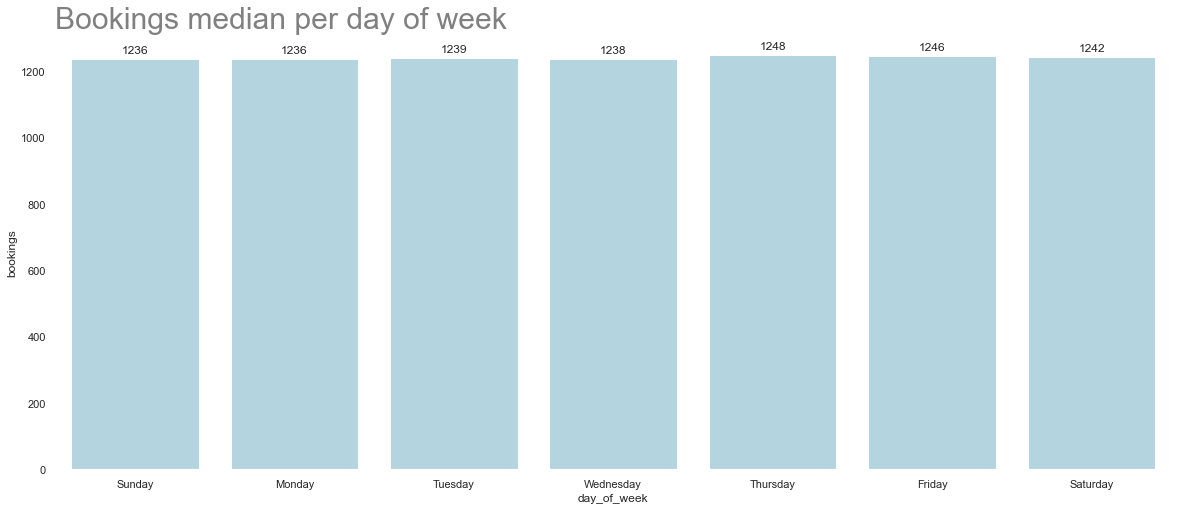

In [26]:
plot_availables = calendar.loc[~calendar.available].groupby(['week', 'day_of_week']).available.count().reset_index()

plot_bookings = plot_availables.rename({'available': 'bookings'}, axis=1)

plot_bookings = plot_bookings.groupby('day_of_week').bookings.median()

plot_bookings = plot_bookings.reset_index()

fig, ax1 = plt.subplots()
g = sns.barplot(
    x='day_of_week', 
    y="bookings", 
    color='lightblue',
    data=plot_bookings, 
)

for p in g.patches:
    g.annotate(
        format(p.get_height(), '.0f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 9), 
        textcoords = 'offset points'
    )
    
plt.title("Bookings median per day of week", fontsize=30, fontweight=0, color='gray', loc='left');

In terms of booking quantity, there is no big variance in day of week.

##### 2 - A good response rate from hosts leads to their place have a higher booking frequency?

In [47]:
def booking_frequency_plot(calendar_df, x, query_interval=None):
    
    calendar = calendar_df.copy()
    
    if query_interval:
        calendar = calendar.query(query_interval).copy()
    
    booking_frequency = calendar.groupby('listing_id').available.value_counts(normalize=True)

    booking_frequency = pd.DataFrame(booking_frequency)

    booking_frequency.columns = ['occupancy %']
    booking_frequency = booking_frequency.reset_index()

    booking_frequency = booking_frequency.query('not available')
    
    cols = ['id', x, 'host_is_superhost']

    response_rate_not_null = f'{x}=={x}'
    
    listings_merge = listings[cols].query(response_rate_not_null).copy()
    
    booking_frequency = booking_frequency.merge(listings_merge, left_on='listing_id', right_on='id')
    
    booking_frequency = booking_frequency.sort_values('host_is_superhost')
    
    sns.scatterplot(data=booking_frequency, x=x, y="occupancy %", hue='host_is_superhost');

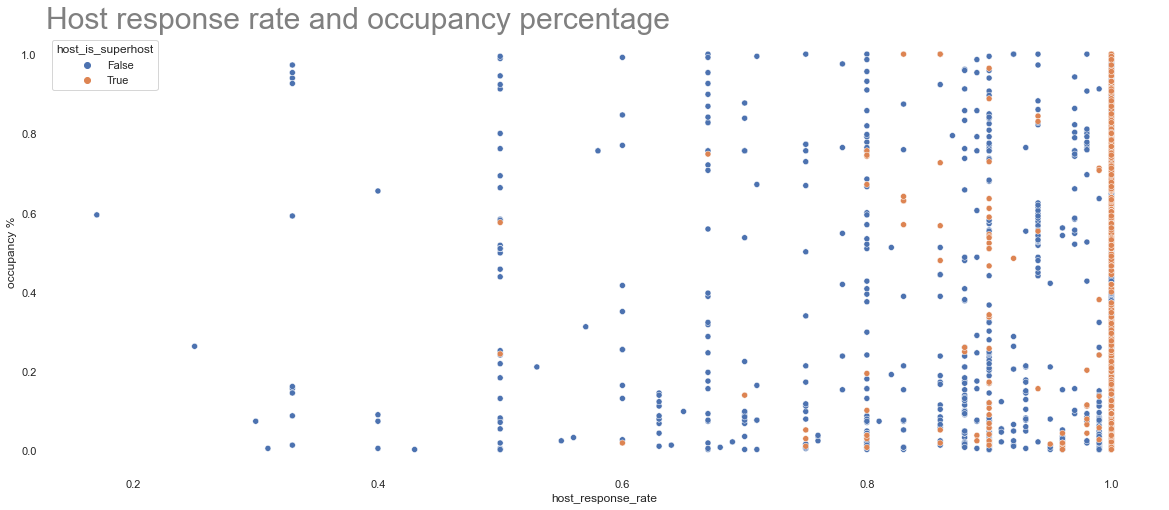

In [29]:
booking_frequency_plot(calendar, x='host_response_rate')

plt.title("Host response rate and occupancy percentage", fontsize=30, fontweight=0, color='gray', loc='left');

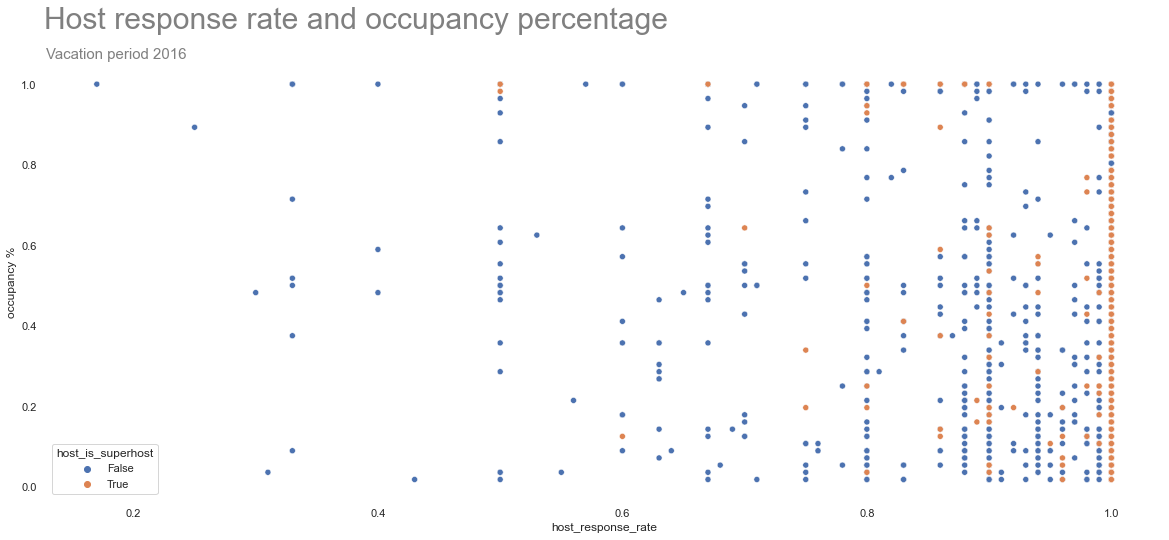

In [48]:
vacation_period = 'date >= "2016-01-01" & date <= "2016-02-28"'

booking_frequency_plot(calendar, x='host_response_rate', query_interval=vacation_period)


plt.suptitle("Host response rate and occupancy percentage", fontsize=30, fontweight=0, color='gray', x=0.34);
plt.title("Vacation period 2016", fontsize=15, fontweight=0, color='gray', loc='left');

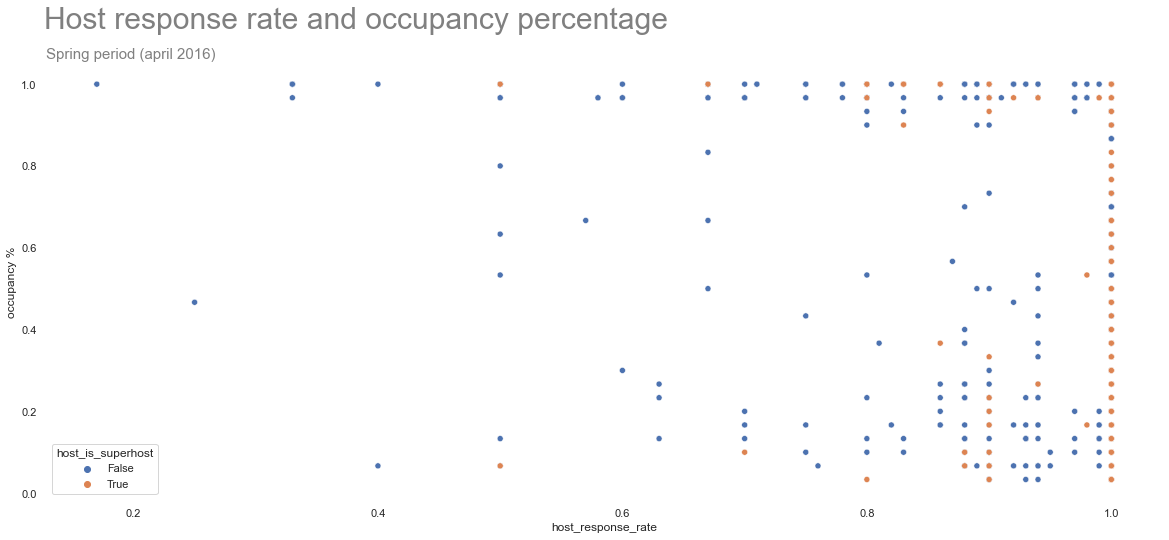

In [50]:
april = 'date >= "2016-04-01" & date <= "2016-04-30"'

booking_frequency_plot(calendar, x='host_response_rate', query_interval=april)

plt.suptitle("Host response rate and occupancy percentage", fontsize=30, fontweight=0, color='gray', x=0.34);
plt.title("Spring period (april 2016)", fontsize=15, fontweight=0, color='gray', loc='left');

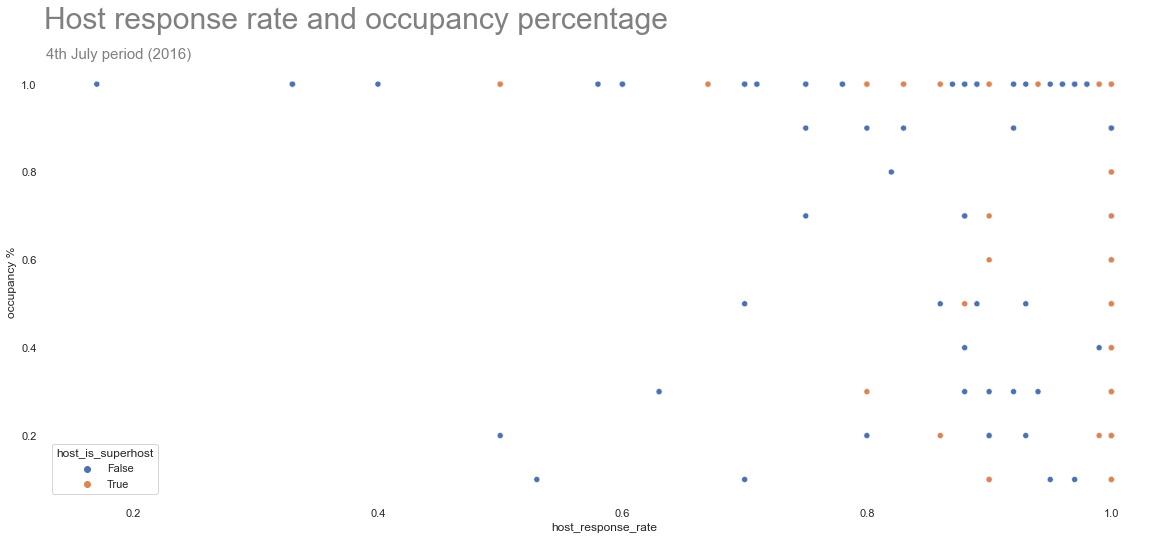

In [52]:
fourth_july = 'date >= "2016-07-01" & date <= "2016-07-10"'

booking_frequency_plot(calendar, x='host_response_rate', query_interval=fourth_july)

plt.suptitle("Host response rate and occupancy percentage", fontsize=30, fontweight=0, color='gray', x=0.34);
plt.title("4th July period (2016)", fontsize=15, fontweight=0, color='gray', loc='left');

As we see answering the 2nd business question, we are unable to check price for there's no variance in price throughout the year.

##### 3 - Do the positive reviews leads to higher prices and booking frequency?

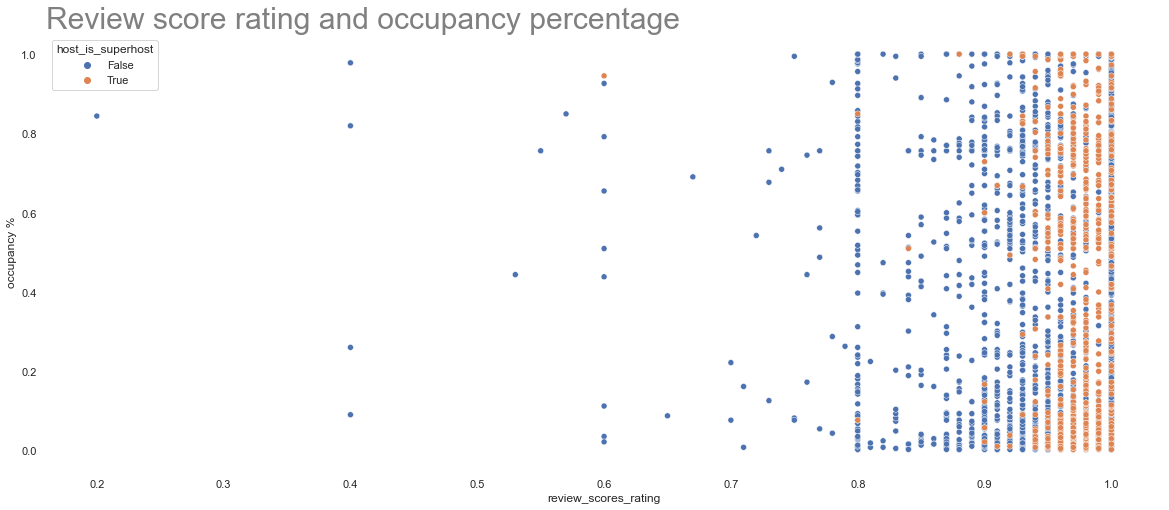

In [41]:
booking_frequency_plot(calendar, x='review_scores_rating')

plt.title("Review score rating and occupancy percentage", fontsize=30, fontweight=0, color='gray', loc='left');

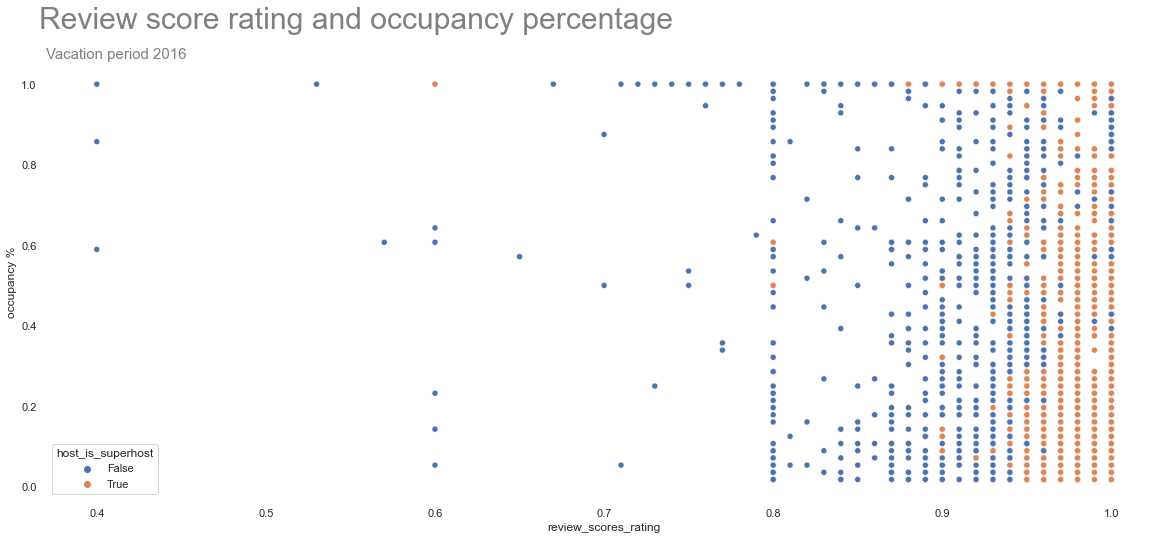

In [53]:
booking_frequency_plot(calendar, x='review_scores_rating', query_interval=vacation_period)

plt.suptitle("Review score rating and occupancy percentage", fontsize=30, fontweight=0, color='gray', x=0.34);
plt.title("Vacation period 2016", fontsize=15, fontweight=0, color='gray', loc='left');

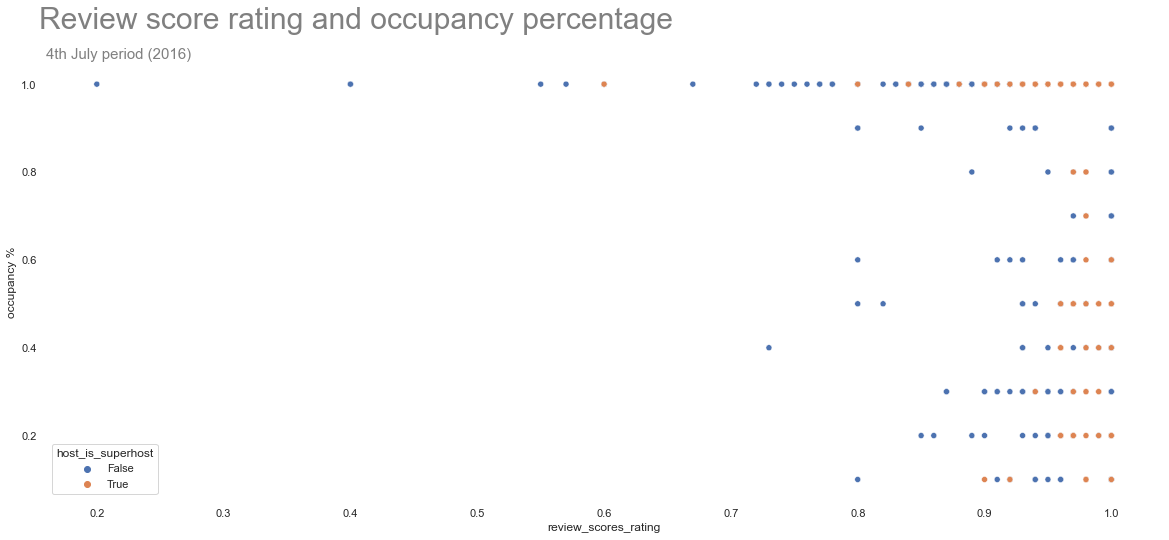

In [55]:
booking_frequency_plot(calendar, x='review_scores_rating', query_interval=fourth_july)

plt.suptitle("Review score rating and occupancy percentage", fontsize=30, fontweight=0, color='gray', x=0.34);
plt.title("4th July period (2016)", fontsize=15, fontweight=0, color='gray', loc='left');

As we see answering the 2nd business question, we are unable to check price for there's no variance in price throughout the year.

### Conclusions

- There are three periods in the year which we can see a higher volume of booking than the rest of the year: 
    - In early 2016: vacation period
    - Early April: Spring season motivates people to visit Seattle
    - Early July: 4th July holiday
- We are unable to draw any conclusions regarding price seasonality and price correlations since there are no variability in the price throughout the year
- There's no correlation in occupancy percentage and response rate. Neither between occupancy percentage and review score. The unique evidence is the superhosts have higher score ratings and response rates than the standard host. However that's likely an obvius conclusion - these probabily are requirements to a host reach a superhost level.